In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('../data/cleaned_churn_data.csv')


print(df.shape)
df.head()

(223966, 12)


,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
0,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
1,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
2,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
3,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
4,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)


In [2]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])
reference_date = df['date_of_registration'].max() 
df['tenure_months'] = ((reference_date - df['date_of_registration']).dt.days // 30)
df.drop('date_of_registration', axis=1, inplace=True)


In [3]:
df1 = df.drop(['customer_id'], axis=1)

In [4]:
df1.gender.replace({'M':1, 'F': 0}, inplace= True)

/tmp/ipykernel_18255/3179259331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'M':1, 'F': 0}, inplace= True)
/tmp/ipykernel_18255/3179259331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({'M':1, 'F': 0}, inplace= True)


In [5]:
df1.gender.unique()

array([0, 1])

In [ ]:
df1.churn.info()

In [7]:
df1 = pd.get_dummies(data= df1, columns = ['province', 'provider_nepal'])

In [8]:
df1

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
0,0,55,2,130556,62,39,5973,0,40,False,False,True,False,False,False,False,True,False
1,0,57,0,148828,49,24,193,1,40,False,False,False,True,False,False,False,False,True
2,1,46,1,38722,80,25,9377,1,40,True,False,False,False,False,False,False,False,True
3,0,26,2,55098,78,15,1393,0,40,False,True,False,False,False,False,False,False,True
4,1,36,1,73452,91,24,8109,0,40,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223961,0,28,3,130580,28,9,4102,0,0,False,False,True,False,False,False,False,True,False
223962,0,52,0,82393,80,45,7521,0,0,False,False,False,True,False,False,False,True,False
223963,1,59,4,51298,26,4,6547,0,0,False,True,False,False,False,False,False,True,False
223964,1,49,2,83981,80,15,1125,0,0,False,False,False,False,True,False,False,False,True


In [9]:
X = df1.drop('churn', axis=1)
y = df1['churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler =  StandardScaler()
cols_to_scale = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'tenure_months', 'num_dependents']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
train_columns = X.columns

In [11]:
X_test

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
87641,1,-1.648906,-0.707379,-1.717905,-0.476035,0.157366,1.767519,0.350524,False,False,True,False,False,False,False,False,True
142092,1,1.638412,-0.707379,-0.672558,-0.370693,0.861425,-0.359030,-0.501979,False,False,False,False,True,False,False,False,True
39731,0,0.055629,-1.414340,-0.483525,-1.494340,1.072643,0.345608,1.117777,False,False,True,False,False,False,False,True,False
178994,1,-0.979267,-0.000418,1.282392,-1.318770,0.861425,1.560127,-1.013481,False,True,False,False,False,False,False,False,True
114002,0,0.116506,0.706543,-1.214715,-0.405807,-1.109941,0.846014,0.009523,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152199,0,1.455783,1.413503,0.614630,1.314777,0.720613,0.025573,-0.587229,True,False,False,False,False,False,False,False,True
103223,0,0.299134,0.706543,-1.110111,0.612497,1.424672,-1.635311,0.094773,False,False,False,False,False,True,False,True,False
202145,1,-1.040143,-1.414340,-0.818498,-1.669910,0.791019,-1.052089,-1.354482,False,True,False,False,False,False,False,False,True
35364,0,-0.918391,0.706543,0.970070,1.139207,1.917514,-0.133041,1.203027,False,False,True,False,False,False,False,True,False


In [12]:
X_train

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,tenure_months,province_Bagmati,province_Gandaki,province_Karnali,province_Koshi,province_Lumbini,province_Madhesh,province_Sudurpashchim,provider_nepal_Ncell,provider_nepal_Nepal Telecom (NTC)
219201,1,-0.370505,-0.000418,-0.849533,0.015560,-0.405882,-0.966466,-1.695483,False,False,False,False,False,True,False,False,True
143824,1,-0.248752,-0.707379,-0.816874,1.244549,-1.109941,-1.012435,-0.501979,True,False,False,False,False,False,False,True,False
203030,0,1.212278,-0.707379,0.966344,-1.775252,1.635890,-0.918741,-1.439733,False,True,False,False,False,False,False,True,False
57866,1,-1.161896,0.706543,1.129292,1.033865,1.213455,1.695581,0.862026,False,False,False,False,True,False,False,True,False
102296,0,0.299134,-1.414340,0.145110,-0.792061,0.157366,-1.446518,0.180023,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,-0.614010,-1.414340,0.897406,-0.405807,-0.335476,0.467025,-0.160978,False,False,False,False,True,False,False,True,False
103694,1,-1.222772,-0.000418,0.182772,-0.511149,0.509395,0.828468,0.094773,False,False,False,True,False,False,False,False,True
131932,1,0.603516,-0.707379,0.800521,-1.213428,0.086960,-0.619059,-0.331479,False,True,False,False,False,False,False,False,True
146867,0,0.299134,-0.707379,1.307944,0.928523,-0.265070,-1.114552,-0.501979,False,False,False,True,False,False,False,False,True


In [13]:
model_performance = {}

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

baseline_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga',class_weight='balanced', n_jobs=-1)

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))
model_performance['Logistic Regression'] = baseline_model.score(X_test, y_test)

/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Baseline Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60     35844
           1       0.20      0.52      0.29      8950

    accuracy                           0.49     44794
   macro avg       0.50      0.50      0.45     44794
weighted avg       0.68      0.49      0.54     44794



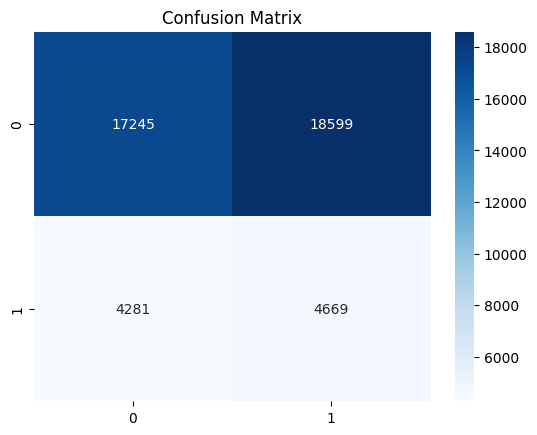

In [15]:
cm_base = confusion_matrix(y_test, y_pred_baseline)
cm_base
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [16]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]


main_model = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',            
    n_estimators=3000,        
    learning_rate=0.01,      
    max_depth=10,            
    min_child_weight=5,       
    gamma=0.2,               
    scale_pos_weight=ratio,  
    subsample=0.8,            
    colsample_bytree=0.8,    
    random_state=42,
    early_stopping_rounds=100 
)


main_model.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=100               
)

# 4. Final Predictions
y_pred_mainmodel = main_model.predict(X_test)

# 5. Professional Results Display
print(f"XGBoost GPU Accuracy: {accuracy_score(y_test, y_pred_mainmodel):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mainmodel))

[0]	validation_0-logloss:0.69308
[100]	validation_0-logloss:0.68654
[200]	validation_0-logloss:0.68164
[300]	validation_0-logloss:0.67749
[400]	validation_0-logloss:0.67388
[500]	validation_0-logloss:0.67056
[600]	validation_0-logloss:0.66721
[700]	validation_0-logloss:0.66411
[800]	validation_0-logloss:0.66111
[900]	validation_0-logloss:0.65823
[1000]	validation_0-logloss:0.65534
[1100]	validation_0-logloss:0.65266
[1200]	validation_0-logloss:0.64975
[1300]	validation_0-logloss:0.64730
[1400]	validation_0-logloss:0.64472
[1500]	validation_0-logloss:0.64225
[1600]	validation_0-logloss:0.63983
[1700]	validation_0-logloss:0.63752
[1800]	validation_0-logloss:0.63527
[1900]	validation_0-logloss:0.63311
[2000]	validation_0-logloss:0.63090
[2100]	validation_0-logloss:0.62884
[2200]	validation_0-logloss:0.62695
[2300]	validation_0-logloss:0.62497
[2400]	validation_0-logloss:0.62303
[2500]	validation_0-logloss:0.62109
[2600]	validation_0-logloss:0.61930
[2700]	validation_0-logloss:0.61758
[280

/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/xgboost/core.py:774: UserWarning: [22:22:05] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [17]:
print(f" Accuracy: {accuracy_score(y_test, y_pred_mainmodel):.2f}")
model_performance['XGB Regression'] =main_model.score(X_test, y_test)

 Accuracy: 0.70


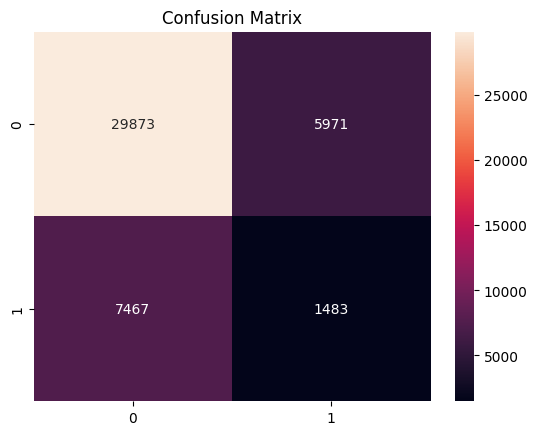

In [18]:
cm_main = confusion_matrix(y_test, y_pred_mainmodel)
cm_main
sns.heatmap(cm_main, annot=True, fmt='d', cmap='rocket')
plt.title("Confusion Matrix")
plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

2026-01-14 22:22:05.645967: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-14 22:22:05.894161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-14 22:22:06.995107: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/keras/src/export/tf2onnx_lib.py

In [20]:

import tensorflow as tf
from tensorflow import keras

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#  Automatic Shape Detection
input_dim = X_train.shape[1] 


model = keras.Sequential([
    layers.Input(shape=(input_dim,)), 
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.2),         
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

#  Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#  Training 
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=64, 
    validation_data=(X_test, y_test)
)

I0000 00:00:1768408627.774640   18255 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6137 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


2026-01-14 22:22:09.112538: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f32e401d920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-14 22:22:09.112553: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2026-01-14 22:22:09.131328: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-14 22:22:09.283028: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


  66/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5815 - loss: 0.7210

I0000 00:00:1768408630.370922   18557 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2800/2800 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7960 - loss: 0.5122 - val_accuracy: 0.8002 - val_loss: 0.5017
Epoch 2/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5027 - val_accuracy: 0.8002 - val_loss: 0.5013
Epoch 3/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5018 - val_accuracy: 0.8002 - val_loss: 0.5013
Epoch 4/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5011 - val_accuracy: 0.8002 - val_loss: 0.5009
Epoch 5/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5009 - val_accuracy: 0.8002 - val_loss: 0.5005
Epoch 6/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7999 - loss: 0.5008 - val_accuracy: 0.8002 - val_loss: 0.5006
Epoch 7/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5007 - val_accuracy: 0.8002 - val_loss: 0.5007
Epoch 8/50
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7999 - loss: 0.5005 - val_accurac

In [22]:
y_pred_probs = model.predict(X_test)

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


In [23]:
results = model.evaluate(X_test, y_test, verbose=0)
model_performance["ANN"] =results[1]

In [24]:
model_performance

{'Logistic Regression': 0.4892173058891816,
 'XGB Regression': 0.7000044648836897,
 'ANN': 0.8001964688301086}

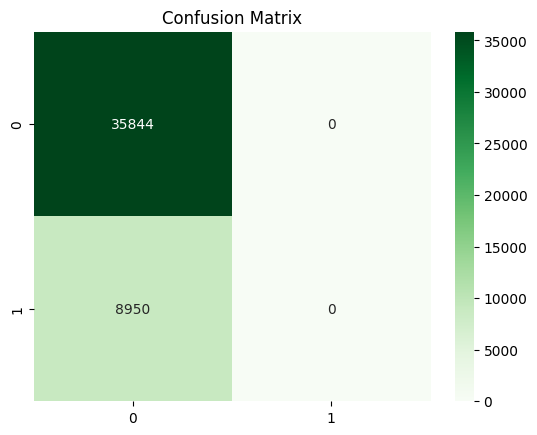

In [25]:
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step


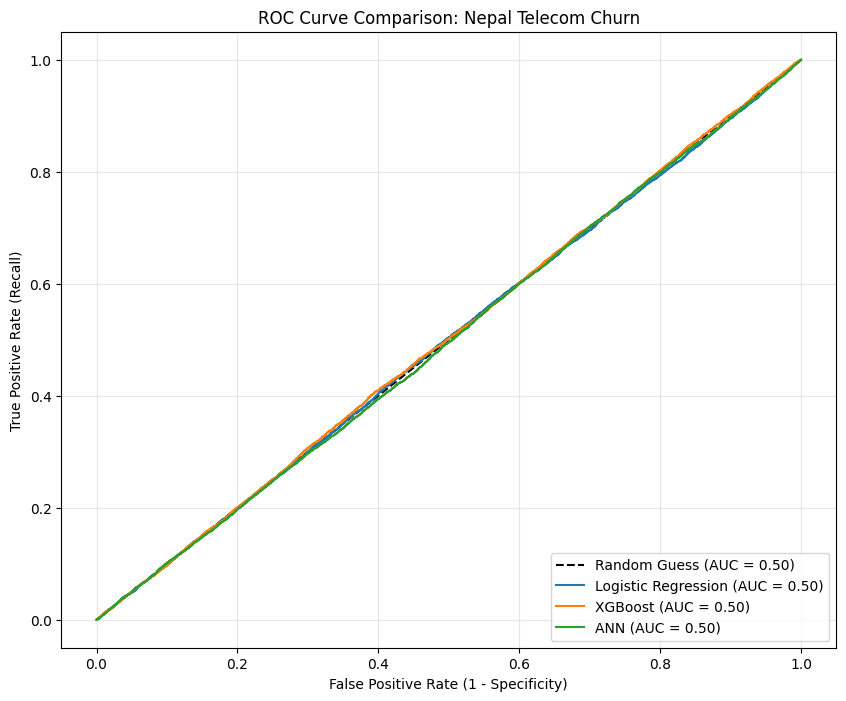

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  Get probabilities for each model
y_prob_log =baseline_model.predict_proba(X_test)[:, 1]
y_prob_xgb = main_model.predict_proba(X_test)[:, 1]
y_prob_ann = model.predict(X_test).ravel() 

#  Setup the Plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

#  Calculate and Plot each model
models = [
    ('Logistic Regression', y_prob_log),
    ('XGBoost', y_prob_xgb),
    ('ANN', y_prob_ann)
]

for name, probs in models:
    fpr, tpr, _ = roc_curve(y_test, probs)
    score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {score:.2f})')

# 4. Final Formatting
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: Nepal Telecom Churn')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [32]:
import pandas as pd
import numpy as np

def predict_customer_churn(name, gender, age, num_dependent, salary, calls, sms, data, province, tenure, provider):
    input_df = pd.DataFrame(0, index=[0], columns=train_columns)
    

    input_df['gender'] = 1 if gender.upper() == 'M' else 0
    input_df['age'] = age
    input_df['num_dependents'] = num_dependent
    input_df['estimated_salary'] = salary
    input_df['calls_made'] = calls
    input_df['sms_sent'] = sms
    input_df['data_used'] = data
    input_df['tenure_months'] = tenure
    

    if f"province_{province}" in input_df.columns:
        input_df[f"province_{province}"] = 1
    if f"provider_nepal_{provider}" in input_df.columns:
        input_df[f"provider_nepal_{provider}"] = 1


    cols_to_scale = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'tenure_months', 'num_dependents']
    

    input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])


    prediction_prob = model.predict(input_df.values, verbose=0)[0][0]
    
    status = "CHURN" if prediction_prob > 0.5 else "STAY"
    if prediction_prob < 0.3:
          risk_level = "LOW"
    elif 0.3 <= prediction_prob < 0.6:
          risk_level = "MEDIUM"
    else:
        risk_level = "HIGH"

    

    print(f"\n{'='*30}")
    print(f" CUSTOMER ANALYSIS: {name.upper()}")
    print(f"{'='*30}")
    print(f" Prediction: {status}")
    print(f" Probability: {prediction_prob:.2%}")
    print(f" Risk Level: {risk_level}")
    print(f"{'='*30}\n")
    
    return status

# --- TEST ---
predict_customer_churn("Aayush", "M", 25, 2, 45000, 15, 5, 100, "Bagmati", 12, "Ncell")


 CUSTOMER ANALYSIS: AAYUSH
 Prediction: STAY
 Probability: 23.94%
 Risk Level: LOW



'STAY'

In [26]:
import joblib
import os

# Create the directory if it doesn't exist
os.makedirs('../model', exist_ok=True)

# 1. Save the ANN Model (Native Keras format)
# Note: Do NOT use joblib for the 'model' object itself
model.save('../model/Churnpred_ann.keras')

# 2. Save the Scaler (StandardScaler works perfectly with joblib)
joblib.dump(scaler, '../model/scaler.pkl')

# 3. Save the Column Names (Crucial for the predict function)
train_columns = X_train.columns.tolist()
joblib.dump(train_columns, '../model/train_columns.pkl')

print("All files saved successfully in ../model/")

All files saved successfully in ../model/
